#  "Explorando el corazón: Utilizando datos clínicos y de estilo de vida para predecir enfermedades cardíacas"


## EVALUACIÓN DEL MODELO

En este notebook, llevaremos a cabo la evaluación de nuestro mejor modelo utilizando diversas métricas relevantes. El objetivo principal es obtener una visión completa del rendimiento del modelo y determinar su eficacia en la detección de enfermedades cardíacas.

Comenzaremos por calcular las métricas de precisión, recall y f1-score. Estas métricas nos proporcionarán información sobre la capacidad del modelo para predecir correctamente tanto los casos positivos como los negativos. La precisión nos dirá qué tan preciso es el modelo al predecir los casos positivos, mientras que el recall nos indicará qué tan bien identifica los casos positivos. El f1-score combina la precisión y el recall en una única métrica que nos ayuda a evaluar el equilibrio entre ambas.

Además de estas métricas, también examinaremos la exactitud (accuracy) del modelo, que nos indica la proporción de predicciones correctas en general. Si bien la exactitud es importante, en este caso particular nos enfocaremos más en las métricas relacionadas con los casos positivos, como el recall.

Otra métrica importante a considerar es el área bajo la curva ROC (AUC-ROC). Esta métrica nos proporciona una medida del rendimiento del modelo en términos de su capacidad para distinguir entre las clases positiva y negativa. Un valor de AUC-ROC cercano a 1 indica un buen rendimiento en la clasificación de los casos.

Además de estas métricas, también evaluaremos la matriz de confusión, que nos mostrará la distribución de las predicciones del modelo en cada clase. Esto nos permitirá identificar posibles áreas de mejora y comprender mejor el rendimiento del modelo.

En resumen, en este notebook llevaremos a cabo una evaluación exhaustiva de nuestro mejor modelo utilizando métricas clave como precisión, recall, f1-score, exactitud y AUC-ROC. También examinaremos la matriz de confusión para obtener una comprensión más detallada del rendimiento del modelo.


In [25]:
# Importamos librerías
# Importamos las distintas librerias necesarias para el análisis

# Tratamiento de datos
import numpy as np
import pandas as pd

# Lectura del modelo
import pickle
import os

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado

from sklearn.metrics import accuracy_score,log_loss, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [17]:
# Leemos el archivo de data/test
y_test = pd.read_csv("../data/test/test.csv")
y_test

,Smoking,Stroke,DiffWalking,Sex,AgeCategory_encoded,Diabetic_encoded,GrupoSalud_Ordinal,HeartDisease
0,1,0,0,0,1,0,1,0
1,0,0,0,0,2,0,1,0
2,1,0,0,0,4,0,1,0
3,0,0,0,0,9,0,3,0
4,1,0,1,0,8,0,3,0
...,...,...,...,...,...,...,...,...
63954,1,0,0,1,12,0,1,0
63955,1,0,0,1,3,0,2,0
63956,0,0,0,0,3,0,1,0
63957,0,0,0,1,10,0,1,0


In [18]:
# Seleccionamos únicamente la columna a predecir
y_test = y_test['HeartDisease']


In [19]:
# Cargamos el modelo desde el archivo
with open('../models/trained_model_RandomForest.pkl', 'rb') as file:
    mejor_modelo_RandomForest = pickle.load(file)

In [20]:
# Este es nuestro mejor modelo de RandomForest
mejor_modelo_RandomForest

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

### MÉTRICAS DE ACCURACY, PRECISIÓN, RECALL, SCORE F1

In [21]:
# Calculamos las distintas métricas del modelo
accuracy = accuracy_score(y_test, mejor_modelo_RandomForest)
precision = precision_score(y_test, mejor_modelo_RandomForest)
recall = recall_score(y_test, mejor_modelo_RandomForest)
f1 = f1_score(y_test, mejor_modelo_RandomForest)

print("Accuracy:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("Score F1:", f1)

Accuracy: 0.7076408324082616
Precisión: 0.20336758249219208
Recall: 0.8034692417739628
Score F1: 0.3245800975257359


#
<details>
<summary>Explicación de las metricas</summary>
<p>

Las métricas nos indican que el modelo tiene una precisión y un puntaje F1 relativamente bajos, lo que nos sugiere que hay una proporción considerable de falsos positivos en las predicciones. Sin embargo, el recall es alto, lo que significa que el modelo es capaz de identificar correctamente la mayoría de los casos positivos. En el contexto de la detección de enfermedades cardíacas, esto podría ser beneficioso, ya que es importante identificar correctamente a los pacientes que realmente tienen la enfermedad.
</p>
</details>

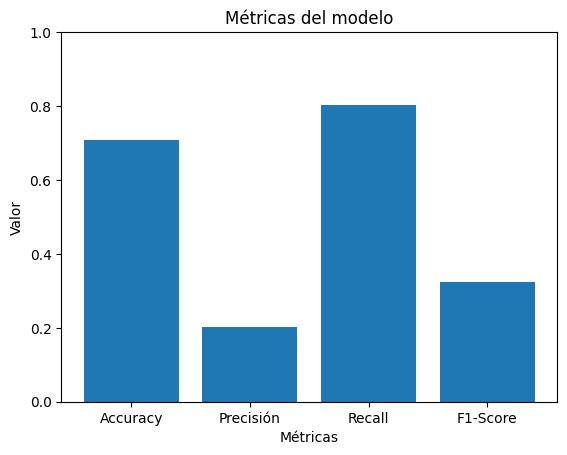

In [12]:

# Calculamos las métricas
accuracy = accuracy_score(y_test, mejor_modelo_RandomForest)
precision = precision_score(y_test, mejor_modelo_RandomForest)
recall = recall_score(y_test, mejor_modelo_RandomForest)
f1 = f1_score(y_test, mejor_modelo_RandomForest)

# Creamos una lista con las métricas sus nombres 
metricas = ['Accuracy', 'Precisión', 'Recall', 'F1-Score']
valores = [accuracy, precision, recall, f1]

plt.bar(metricas, valores)
plt.ylim([0, 1])  # Ajustar el rango del eje y entre 0 y 1
plt.title('Métricas del modelo')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.show()


Gráfico guardado en: c:\Users\alexm\OneDrive\Escritorio\CURSO DATA SCIENCE BOOTCAMP\PROYECTO-MACHINE-LEARNING\notebooks\..\docs\imagenes\pie_plot_recall.png


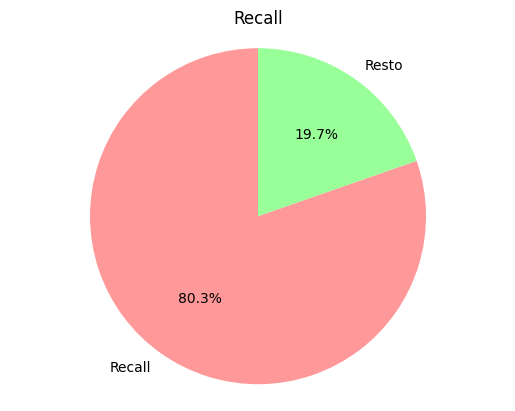

In [33]:
# Hacemos un pie plot del recall
recall = recall_score(y_test, mejor_modelo_RandomForest)

# Calcular el porcentaje de recall
porcentaje_recall = recall * 100

# Definir las etiquetas y los valores para el gráfico de pie
labels = ['Recall', 'Resto']
sizes = [porcentaje_recall, 100 - porcentaje_recall]

# Definir los colores de las porciones del gráfico
colors = ['#ff9999', '#99ff99']

# Crear el gráfico de pie
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Ajustar el aspecto del gráfico
plt.axis('equal')
plt.title('Recall')

# Guardar el gráfico en el directorio actual
current_dir = os.getcwd()
output_file = os.path.join(current_dir, '..', 'docs', 'imagenes', 'pie_plot_recall.png')
plt.savefig(output_file)

print(f"Gráfico guardado en: {output_file}")


In [27]:
# Guardarlo en imagenes
current_dir = os.getcwd() # directorio actual de trabajo
imagenes_dir = os.path.join(current_dir, '..', 'docs', 'imagenes') # la ruta de imagenes
imagen_path = os.path.join(imagenes_dir, 'recall_pie_plot.png') # lo guardamos con el nombre especificado
plt.savefig(imagen_path)

<Figure size 640x480 with 0 Axes>

### INFORME DE CLASIFICACIÓN

In [30]:
report = classification_report(y_test, mejor_modelo_RandomForest)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     58367
           1       0.20      0.80      0.32      5592

    accuracy                           0.71     63959
   macro avg       0.59      0.75      0.57     63959
weighted avg       0.91      0.71      0.77     63959




<details>
<summary>Explicación del informe de clasificación</summary>
<p>
El informe de clasificación proporciona información valiosa sobre las métricas de rendimiento del modelo. En el contexto de la detección de enfermedades cardíacas, donde el objetivo principal es identificar correctamente los casos positivos, el recall se convierte en una métrica fundamental.

En el caso del informe de clasificación, el modelo presenta una precisión de 0.20 para la clase 1 (heartdisease) y un recall de 0.80 para la misma clase. Esto significa que el modelo tiene una capacidad limitada para predecir correctamente los casos positivos, ya que tiene un alto número de falsos positivos. Sin embargo, el recall del 0.80 indica que el modelo tiene una buena capacidad para identificar los casos positivos existentes. Es importante tener en cuenta que el modelo también muestra una precisión del 0.97 para la clase 0 (no heartdisease), lo cual indica que el modelo tiene una alta precisión en la predicción de los casos negativos.

En general, el modelo tiene un rendimiento adecuado en términos de recall para los casos positivos. 

</p>
</details>

### MATRIZ DE CONFUSIÓN

In [35]:
# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, mejor_modelo_RandomForest)
cm


array([[40767, 17600],
       [ 1099,  4493]], dtype=int64)

Matriz de confusión guardada en: c:\Users\alexm\OneDrive\Escritorio\CURSO DATA SCIENCE BOOTCAMP\PROYECTO-MACHINE-LEARNING\notebooks\..\docs\imagenes\matriz_confusion.png


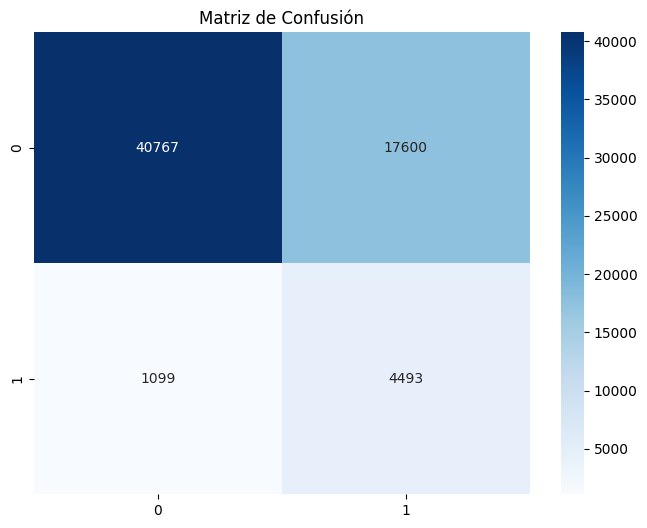

In [37]:
# Visualizamos la matriz de confusión
plt.figure(figsize=(8, 6))

# Mapa de calor
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") # con "fmt='d'" indicamos que los valores se mostrarán como enteros.

plt.title("Matriz de Confusión")

# Guardar la matriz de confusión en el directorio actual
current_dir = os.getcwd()
output_file = os.path.join(current_dir, '..', 'docs', 'imagenes', 'matriz_confusion.png')
plt.savefig(output_file)

print(f"Matriz de confusión guardada en: {output_file}")



<details>
<summary>Explicación de la matriz de confusión</summary>
<p>
La matriz de confusión es una herramienta que permite visualizar el desempeño de un modelo de clasificación al mostrar la cantidad de muestras que fueron clasificadas correctamente e incorrectamente para cada clase.

En el caso de tu matriz de confusión:

**Verdaderos positivos (TP)**: 4493
Representa la cantidad de casos positivos (heartdisease) que fueron correctamente clasificados como positivos por el modelo. Estos son los casos que el modelo logró identificar correctamente como personas con enfermedad cardíaca.

**Falsos positivos (FP)**: 17600
Representa la cantidad de casos negativos (no heartdisease) que fueron incorrectamente clasificados como positivos por el modelo. Estos son los casos en los que el modelo predijo incorrectamente que una persona tiene enfermedad cardíaca cuando en realidad no la tiene.

**Verdaderos negativos (TN)**: 40767
Representa la cantidad de casos negativos que fueron correctamente clasificados como negativos por el modelo. Estos son los casos en los que el modelo predijo correctamente que una persona no tiene enfermedad cardíaca.

**Falsos negativos (FN)**: 1099
Representa la cantidad de casos positivos que fueron incorrectamente clasificados como negativos por el modelo. Estos son los casos en los que el modelo no logró identificar correctamente a las personas con enfermedad cardíaca y las clasificó erróneamente como personas sanas.

En resumen, la matriz de confusión muestra que el modelo clasificó correctamente a 4493 personas con enfermedad cardíaca (verdaderos positivos) y a 40767 personas sin enfermedad cardíaca (verdaderos negativos). Sin embargo, el modelo también cometió errores al clasificar erróneamente a 17600 personas sanas como enfermas (falsos positivos) y a 1099 personas con enfermedad cardíaca como sanas (falsos negativos).


</p>
</details>